# Great Schools Ratings: Exploratory Data Analysis

#### Imports

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [67]:
# Read in dataframe

df = pd.read_csv('combined_df.csv')

### Discrete Distributions

In [307]:
def discrete_histogram(dataframe,column, title, xlabel, ylabel, color='darkturquoise'):
    '''Creates a histogram for discrete data
    
    Parameters
    ----------
    dataframe: dataframe
    column: column of discrete values (in quotes)
    title: title of histogram (in quotes)
    xlabel: x-axis label (in quotes)
    ylabel: y-axis label (in quotes)
    
    Returns
    -------
    Histogram with lines representing the mean and median
    
    '''
    f, ax = plt.subplots(figsize=(8,6))
    sns.set_style("darkgrid")
    sns.distplot(dataframe[column], bins=10, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim(dataframe[column].min(), dataframe[column].max())
    plt.xticks(np.arange(dataframe[column].min(), dataframe[column].max()+1))
    plt.axvline(dataframe[column].mean(), color='b', linewidth = 2, linestyle = 'dashed', label = 'Mean')
    plt.axvline(dataframe[column].median(), color='peru', linewidth = 2, linestyle = 'dashed', label = 'Median')
    plt.legend(prop={'size': 12});

#### Test Scores Rating Distribution

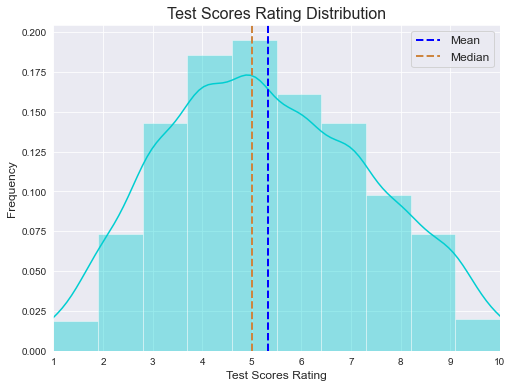

In [308]:
discrete_histogram(df, 'subratings_Test Scores Rating', 'Test Scores Rating Distribution', 
                   'Test Scores Rating', 'Frequency', 'darkturquoise')

In [315]:
df['subratings_Test Scores Rating'].mean(), df['subratings_Test Scores Rating'].median(), len(df['subratings_Test Scores Rating'])

(5.331391585760517, 5.0, 1588)

#### College Readiness Rating Distribution

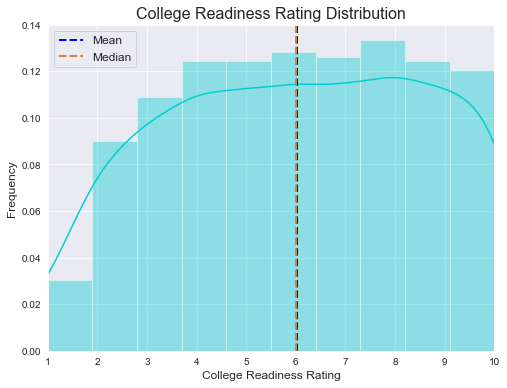

In [309]:
discrete_histogram(df, 'subratings_College Readiness Rating', 'College Readiness Rating Distribution', 
                   'College Readiness Rating', 'Frequency')


#### Equity Overview Rating Distribution

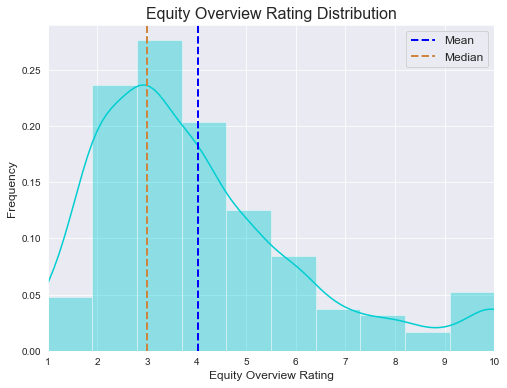

In [310]:
discrete_histogram(df, 'subratings_Equity Overview Rating', 'Equity Overview Rating Distribution', 
                   'Equity Overview Rating', 'Frequency')


#### Student Progress Rating Distribution

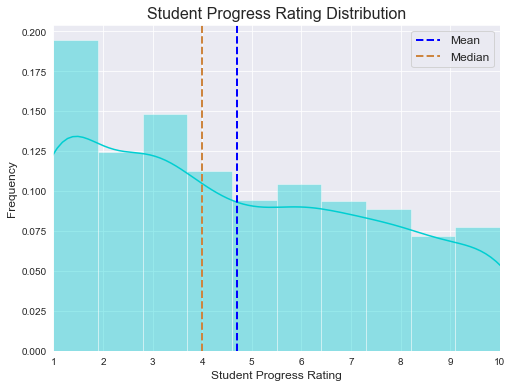

In [311]:
discrete_histogram(df, 'subratings_Student Progress Rating', 'Student Progress Rating Distribution', 
                   'Student Progress Rating', 'Frequency')

### Continuous Distributions

In [312]:
def continuous_histogram(dataframe,column, title, xlabel, ylabel, color):
    f, ax = plt.subplots(figsize=(8,6))
    sns.set_style("darkgrid")
    sns.distplot(dataframe[column], bins=10, ax = ax, color = color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim(0,100)
    plt.axvline(df[column].mean(), color='b', linewidth = 2, linestyle = 'dashed', label = 'Mean')
    plt.axvline(df[column].median(), color='peru', linewidth = 2, linestyle = 'dashed', label = 'Median')
    plt.legend(prop={'size': 12});
    

#### Percent Low Income Distribution

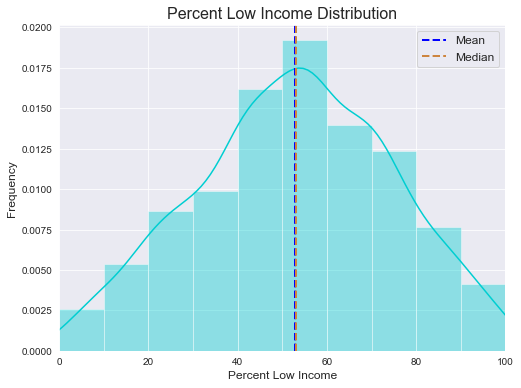

In [313]:
continuous_histogram(df, 'percentLowIncome', 'Percent Low Income Distribution', 
                   'Percent Low Income', 'Frequency', 'darkturquoise')

The median and mean percent of low income students is essentially the same at 53 and 52.77% respectively. The total number of high schools sampled is 1588.

In [284]:
df['percentLowIncome'].median(), df['percentLowIncome'].mean(), len(df['percentLowIncome'])

(53.0, 52.773929471032744, 1588)

### Comparative Graphs

In [126]:
# Scatterplot function
def scatterplot(x, y, data, title, xlabel, ylabel, hline=0, vline=0):
    f, ax = plt.subplots(figsize=(8,6))
    plt.scatter(x, y, data=data, s=8)
    plt.title(title, fontsize=16)
    plt.xticks(np.arange(0, data[x].max(), step=10))
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    if hline != 0:
        plt.axhline(hline, color='r')
    if vline != 0:
        plt.axvline(vline, color='g')
    


#### Percent Low Income vs. Percent College Rate

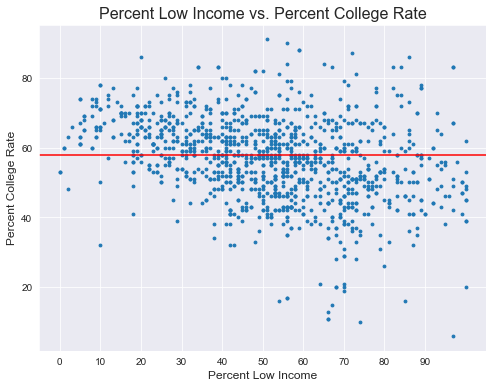

In [127]:
scatterplot('percentLowIncome', 'collegeEnrollmentData_school_value', df, 
            'Percent Low Income vs. Percent College Rate', 'Percent Low Income', 'Percent College Rate', 
            hline=df['collegeEnrollmentData_state_average'].mean())

#### Students per teacher vs. college enrollment rates

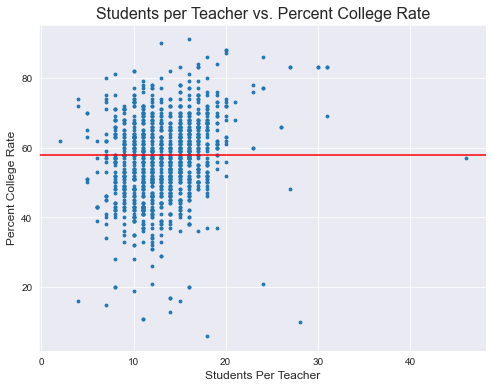

In [128]:
scatterplot('studentsPerTeacher', 'collegeEnrollmentData_school_value', df, 
            'Students per Teacher vs. Percent College Rate', 'Students Per Teacher', 'Percent College Rate', 
            hline=df['collegeEnrollmentData_state_average'].mean())

In [166]:
# Exploratory Boxplot
def exploratory_boxplot(x, y, df, title, xlabel, ylabel):
    sns.set_style("darkgrid")
    ax = sns.boxplot(x, y,
                 data=df, palette="Set3")
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12);

#### Boxplot of College Readiness Ratings by Students per Teacher

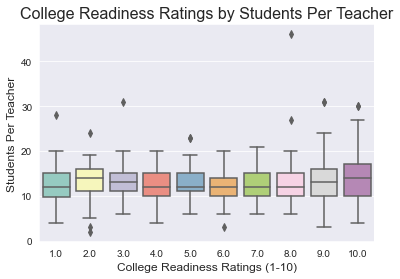

In [167]:
exploratory_boxplot('subratings_College Readiness Rating', 'studentsPerTeacher', df, 
                                         'College Readiness Ratings by Students Per Teacher', 
                                         'College Readiness Ratings (1-10)',
                                        'Students Per Teacher')

We don't see a major pattern between college readiness ratings and students per teacher. In fact, the median students per teacher for schools rated a 9 or a 10 are higher than lower ratings.

#### Boxplot of Student Progress Rating by Students per Teacher

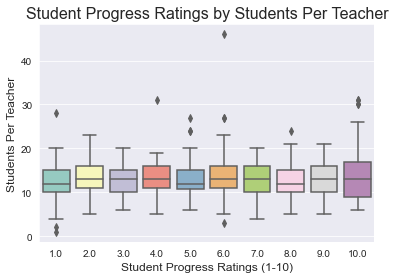

In [168]:
exploratory_boxplot('subratings_Student Progress Rating', 'studentsPerTeacher', df, 
                                         'Student Progress Ratings by Students Per Teacher', 
                                         'Student Progress Ratings (1-10)',
                                        'Students Per Teacher');

In [169]:
df.groupby('subratings_Student Progress Rating')['studentsPerTeacher'].median()

subratings_Student Progress Rating
1.0     12.0
2.0     13.0
3.0     13.0
4.0     13.0
5.0     12.0
6.0     13.0
7.0     13.0
8.0     12.0
9.0     13.0
10.0    13.0
Name: studentsPerTeacher, dtype: float64

#### Boxplot comparing percent low income to student progress rating

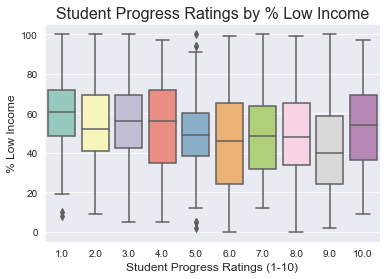

In [170]:
exploratory_boxplot('subratings_Student Progress Rating', 'percentLowIncome', df, 
                                         'Student Progress Ratings by % Low Income', 
                                         'Student Progress Ratings (1-10)',
                                        '% Low Income');

In [171]:
df.groupby('subratings_Student Progress Rating')['percentLowIncome'].median()

subratings_Student Progress Rating
1.0     60.5
2.0     52.0
3.0     56.0
4.0     56.0
5.0     49.0
6.0     46.0
7.0     48.5
8.0     48.0
9.0     40.0
10.0    54.0
Name: percentLowIncome, dtype: float64

#### Boxplot comparing percent low income and test score ratings

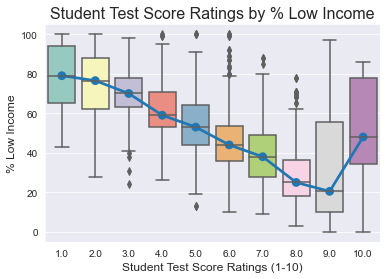

In [172]:
sns.pointplot(x='subratings_Test Scores Rating', y='percentLowIncome', data=df.groupby('subratings_Test Scores Rating', as_index=False).median())
exploratory_boxplot('subratings_Test Scores Rating', 'percentLowIncome', df, 
                                         'Student Test Score Ratings by % Low Income', 
                                         'Student Test Score Ratings (1-10)',
                                        '% Low Income')


In [150]:
df.groupby('subratings_Test Scores Rating')['percentLowIncome'].median()

subratings_Test Scores Rating
1.0     79.0
2.0     76.5
3.0     70.0
4.0     59.0
5.0     53.0
6.0     44.0
7.0     38.0
8.0     25.0
9.0     20.5
10.0    48.0
Name: percentLowIncome, dtype: float64

We can see a true pattern between test scores and percentage of low income. It is interesting to note that at the 10 test score rating, the median percentage of low income students jumps up to 48%.

### Now we will analyze the distributions based on majority low income schools and minority low incomes schools
A majority low income school is defined as a high school with greater than or equal to 50% low income students. A minority low income school is defined as a high school with less than 50% low income students.

In [174]:
# Subset schools into majority low income and minority low income

df_majority_li = df[df['percentLowIncome'] >= 50.0]
df_minority_li = df[df['percentLowIncome'] < 50.0]

In [185]:
print('Percentage of Texas high schools with majority low income students: {}'.format(len(df_majority_li)/len(df)*100))

print('Percentage of Texas high schools with minority low income students: {}'.format(len(df_minority_li)/len(df)*100))


Percentage of Texas high schools with majority low income students: 57.367758186397985
Percentage of Texas high schools with minority low income students: 42.632241813602015


We can see that more than half (57.37%) of Texas high schools have a majority low income student body.

### Comparative Discrete Distributions Graphs by Majority and Minority Low Income High Schools

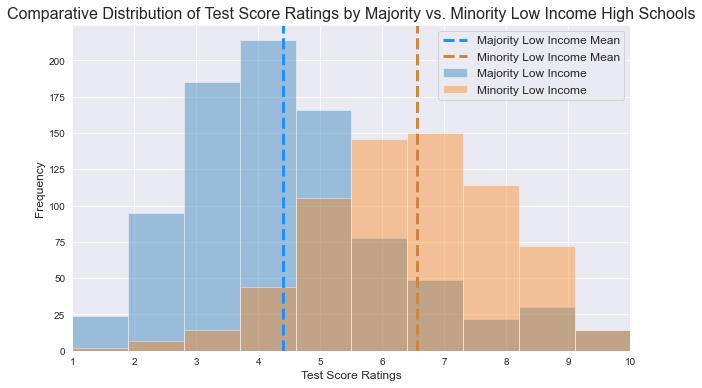

In [233]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")

sns.distplot(df_majority_li['subratings_Test Scores Rating'], bins=10, label = 'Majority Low Income', ax=ax, kde=False)
ax.set_xlim([1, 10])
plt.axvline(df_majority_li['subratings_Test Scores Rating'].mean(), label = 'Majority Low Income Mean', color='dodgerblue', linewidth = 3, linestyle='dashed')

sns.distplot(df_minority_li['subratings_Test Scores Rating'], bins=10, label = 'Minority Low Income', ax=ax, kde=False)
ax.set_xlim([1, 10])
plt.axvline(df_minority_li['subratings_Test Scores Rating'].mean(), label = 'Minority Low Income Mean', color='peru', linewidth = 3, linestyle='dashed')
    
plt.title('Comparative Distribution of Test Score Ratings by Majority vs. Minority Low Income High Schools',fontsize=16)
plt.xlabel('Test Score Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(prop={'size': 12});